In [23]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [24]:
# Stocks= ["ITC.NS"]
Stocks= ["ITC.NS", "BA", "DAI.DE", "EXPE", "GE", "HOG", "MMM", "XOM"]

C:\Users\Harman\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


                     0
2020-12-06  184.668834
                     0
2020-12-13  186.562461


C:\Users\Harman\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


                     0
2020-12-05  180.427639
                    0
2020-12-12  181.56954


C:\Users\Harman\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


                    0
2020-12-06  56.260881
                    0
2020-12-13  57.750424


C:\Users\Harman\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


                     0
2020-12-05  107.979173
                     0
2020-12-12  108.514409


C:\Users\Harman\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


                   0
2020-12-05  2.608353
                  0
2020-12-12  1.35724


C:\Users\Harman\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


                    0
2020-12-05  37.587063
                    0
2020-12-12  38.664077


C:\Users\Harman\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


                    0
2020-12-05  168.04146
                     0
2020-12-12  168.226733


C:\Users\Harman\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


                    0
2020-12-05  38.141354
                    0
2020-12-12  38.526716


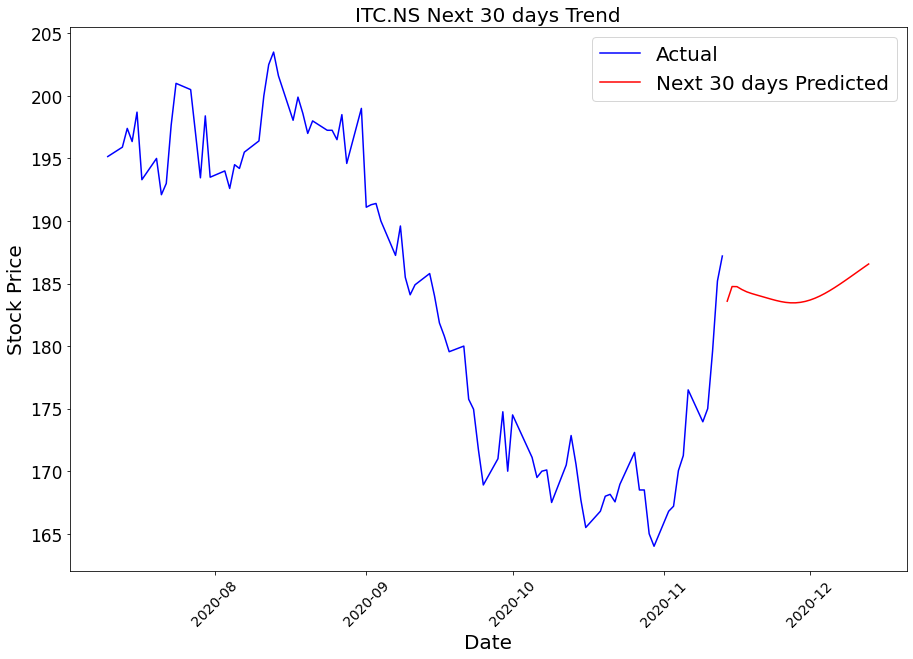

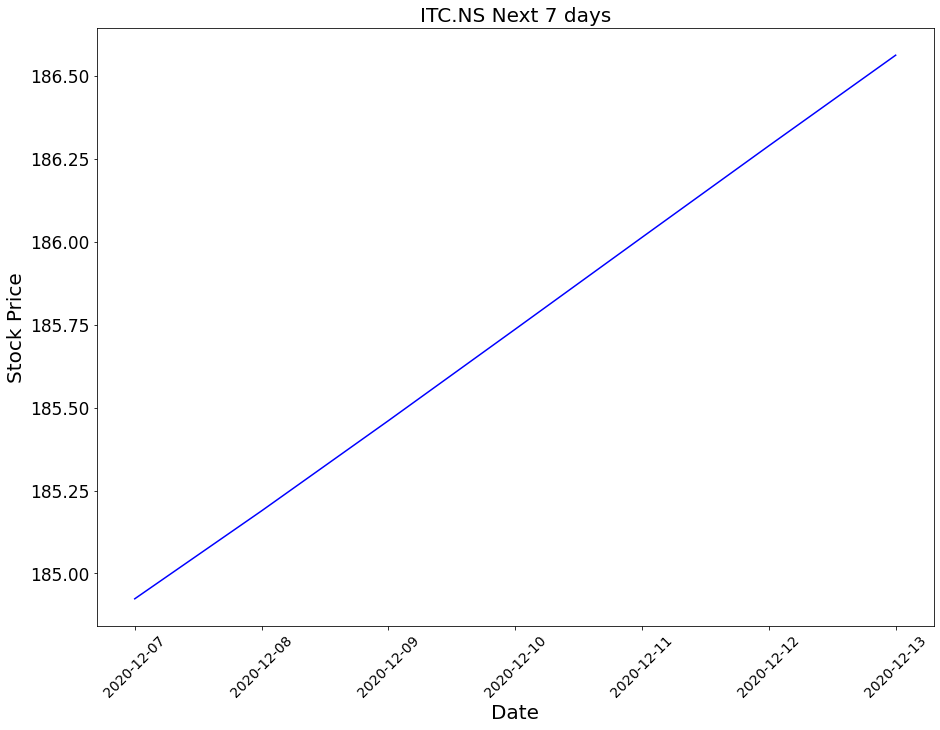

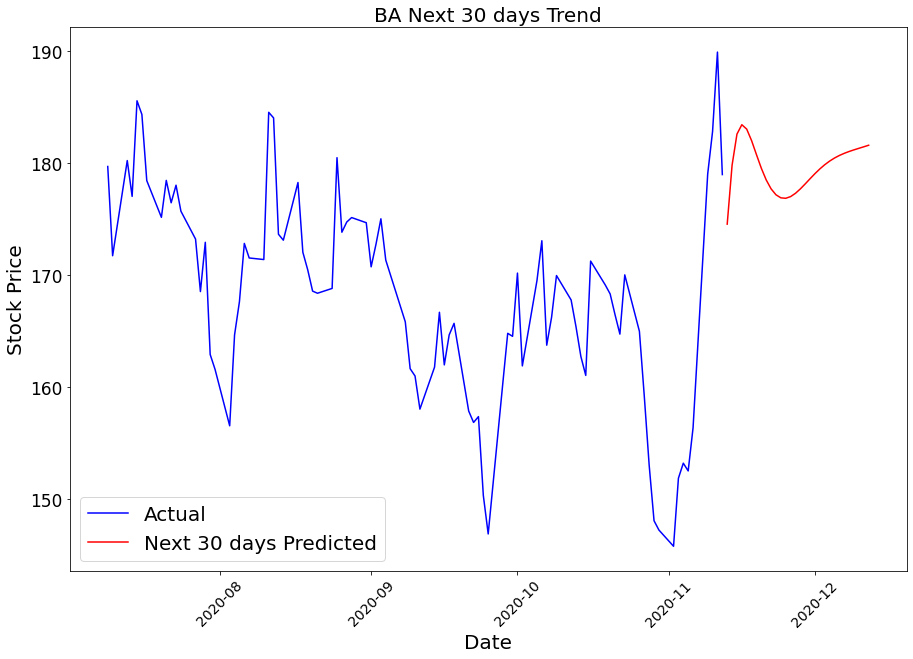

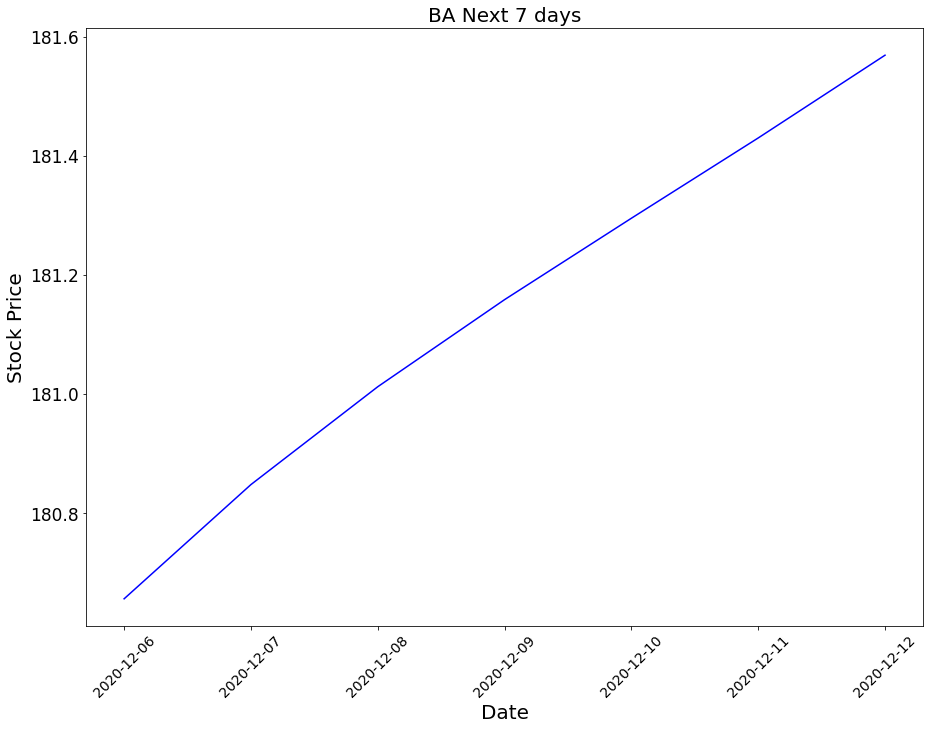

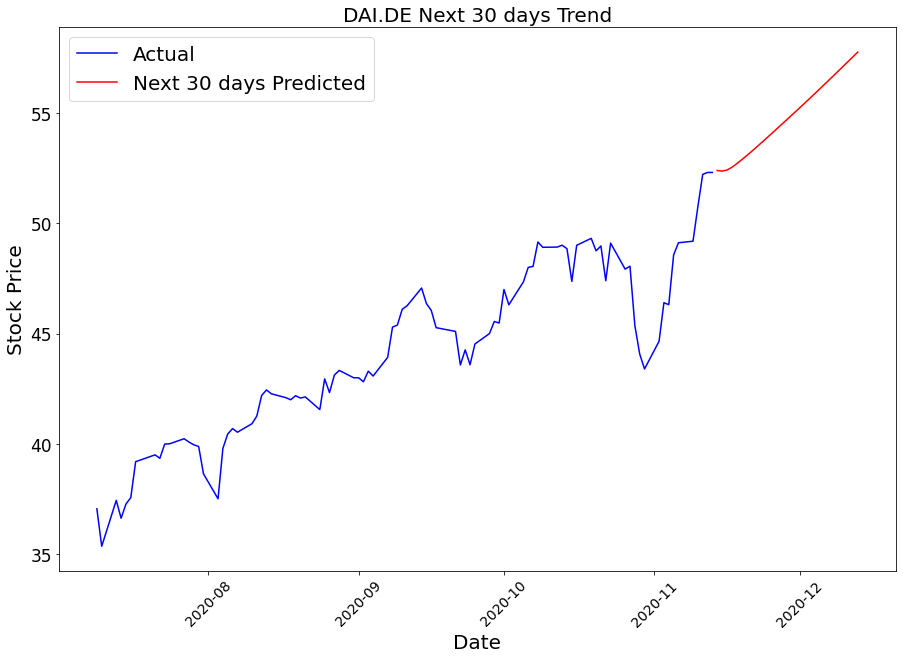

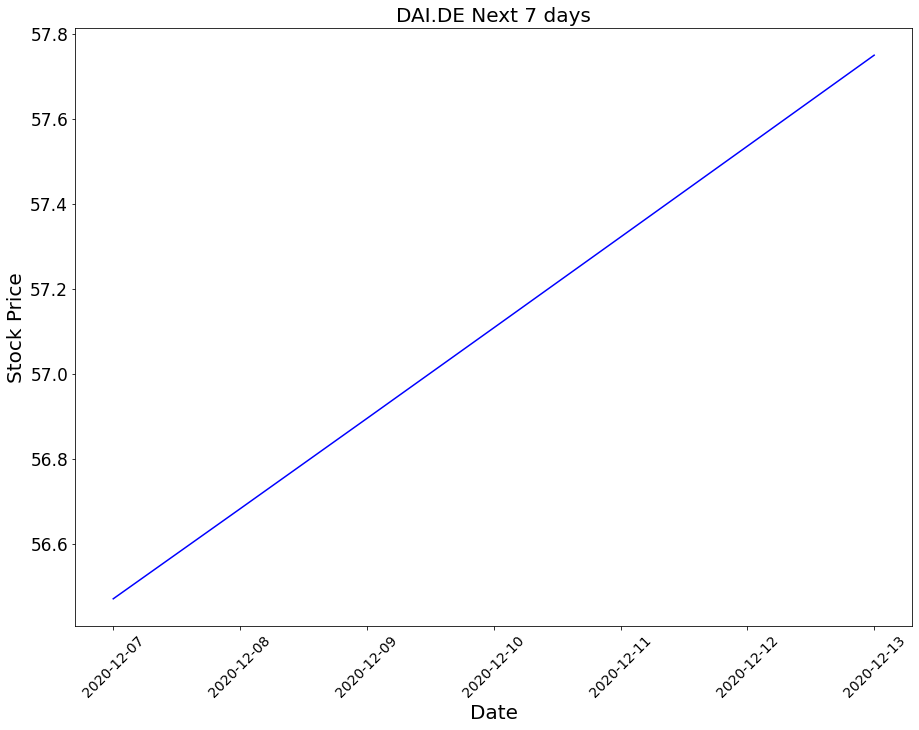

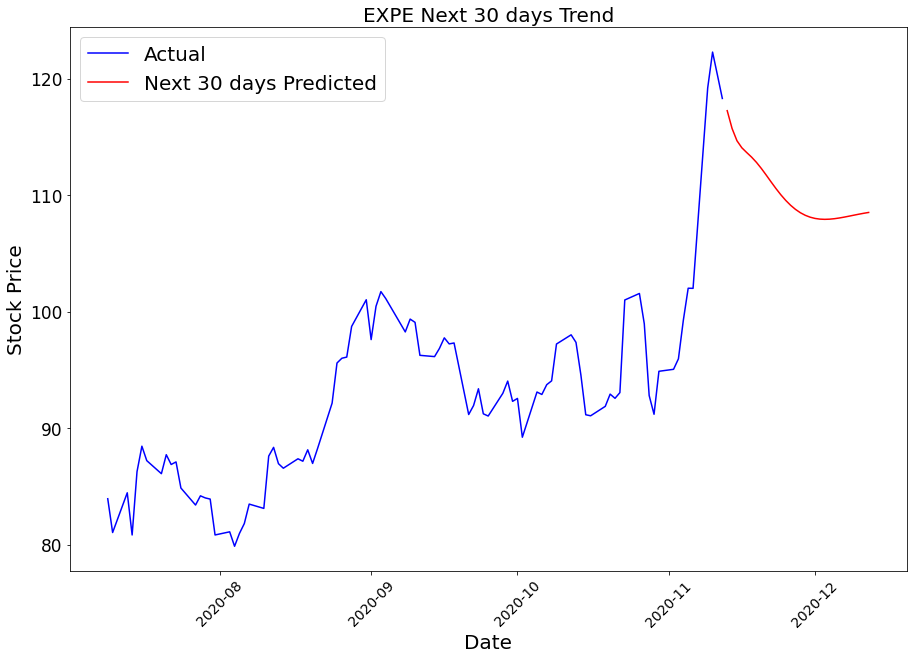

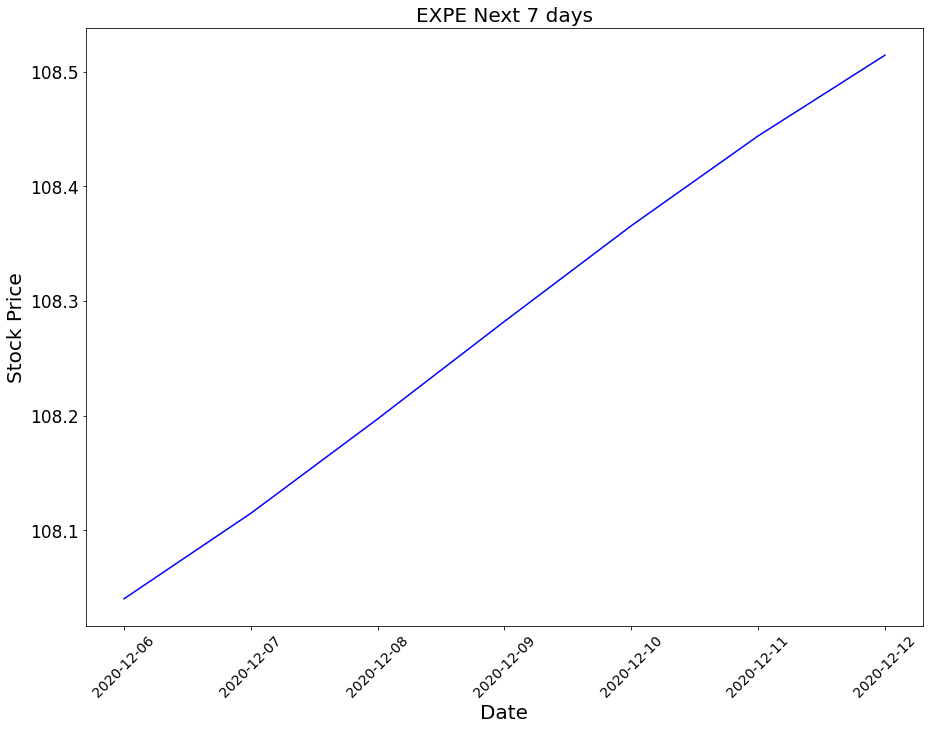

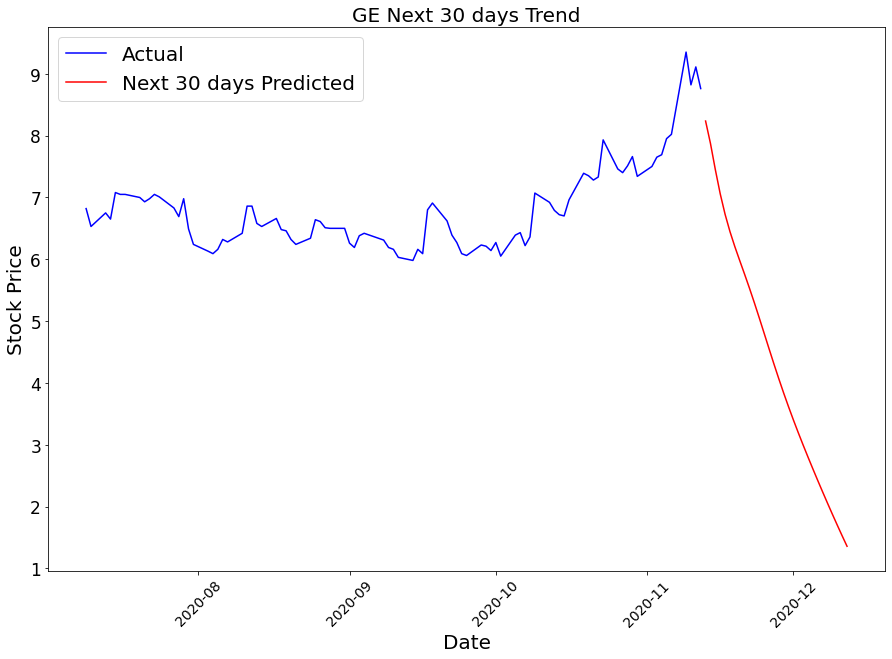

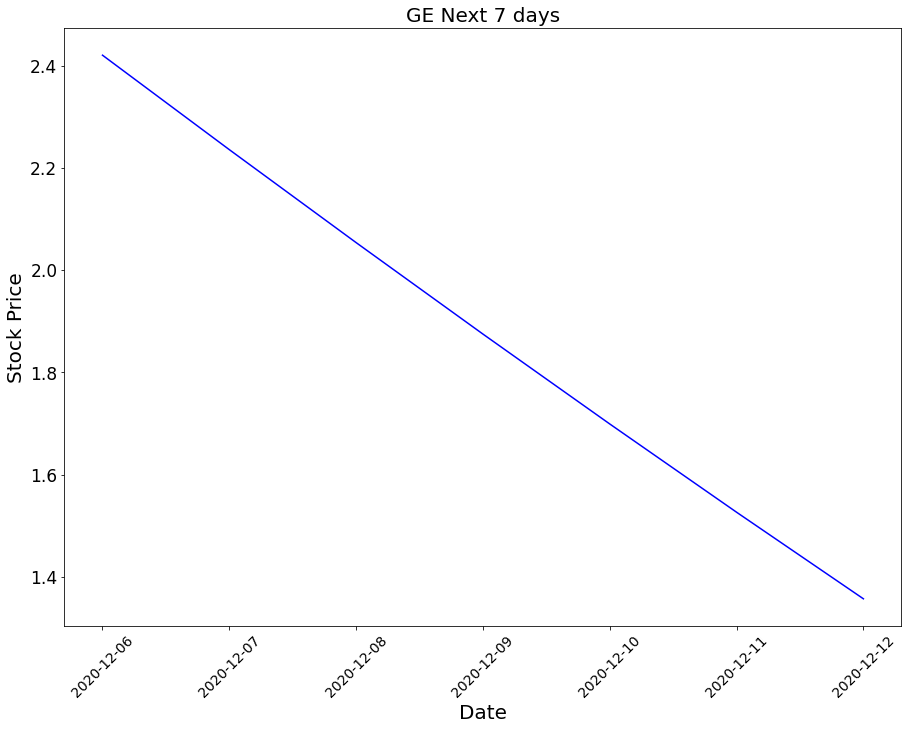

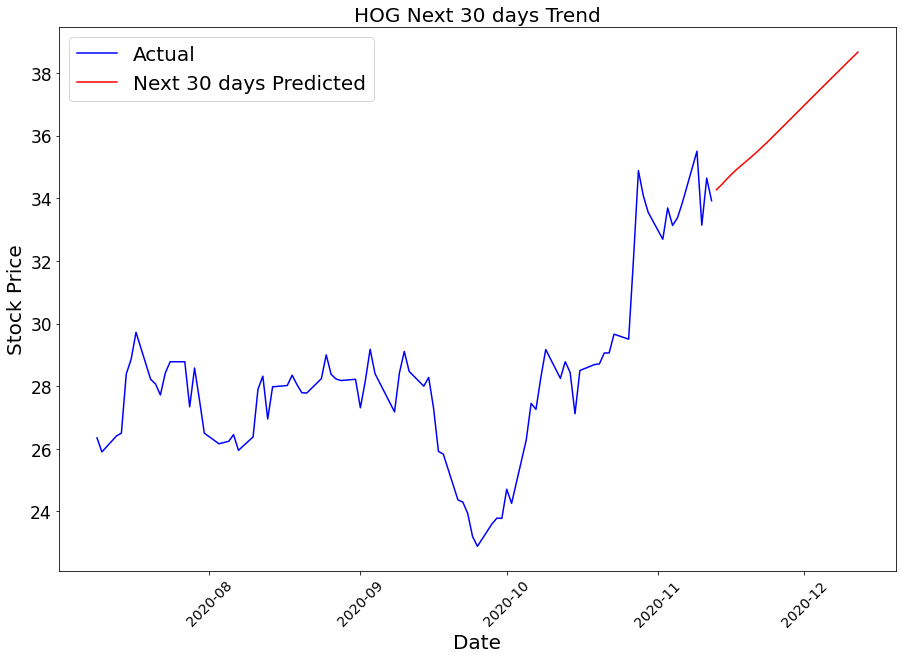

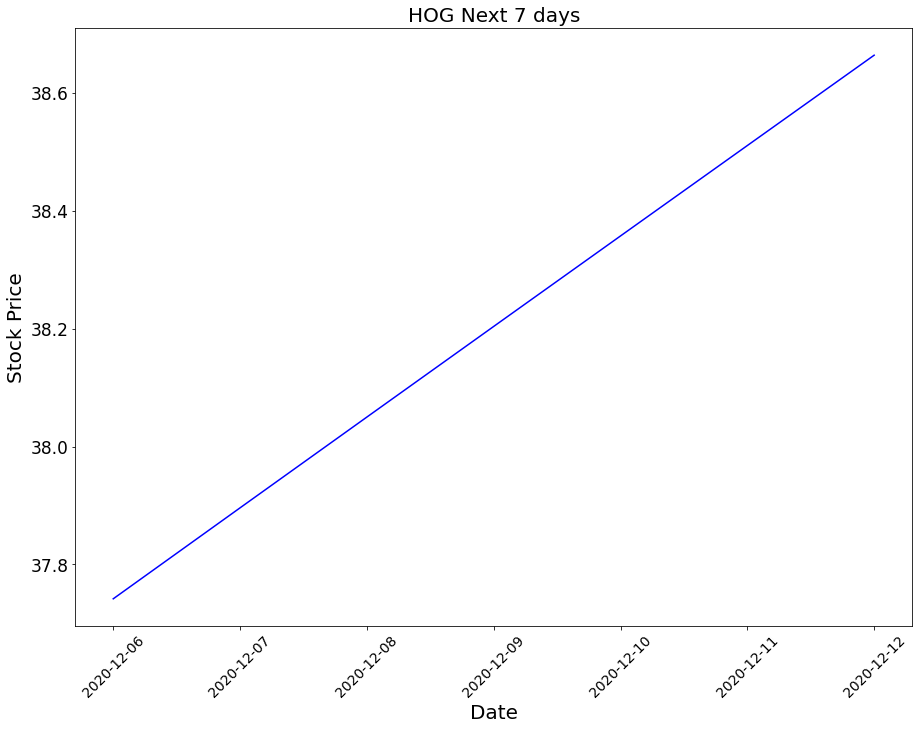

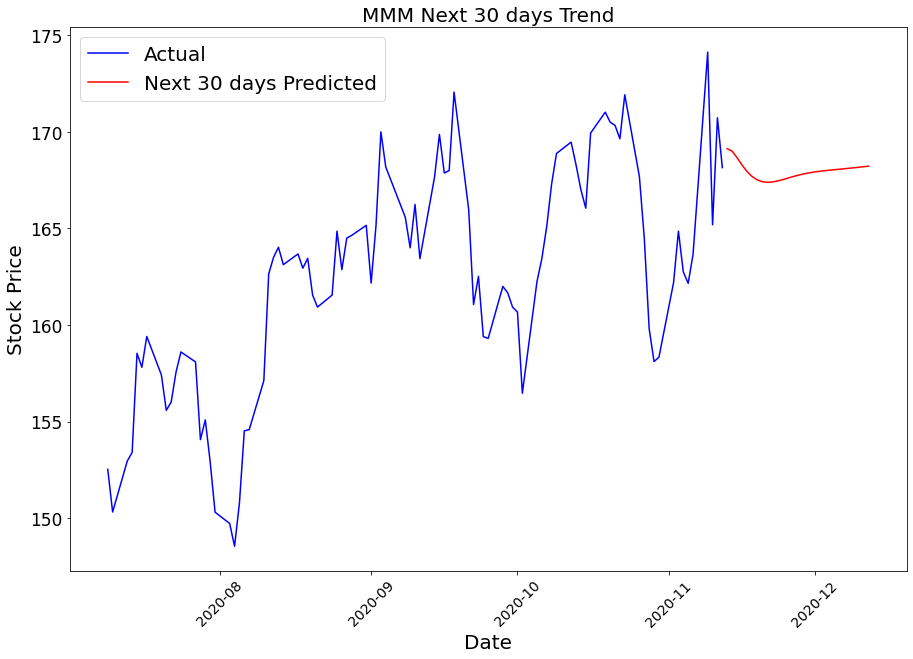

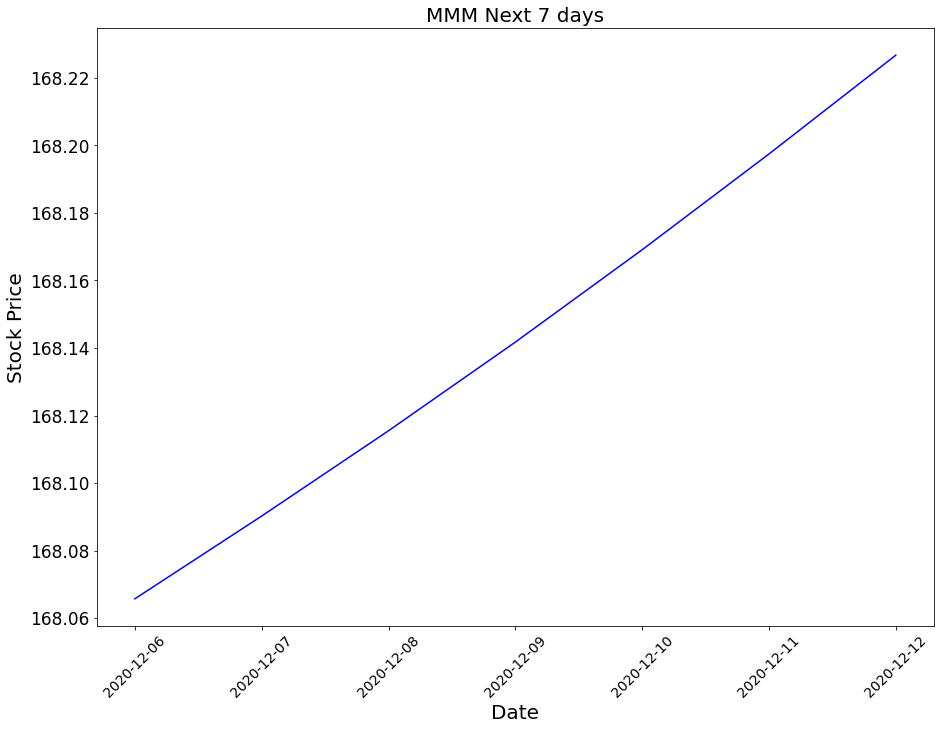

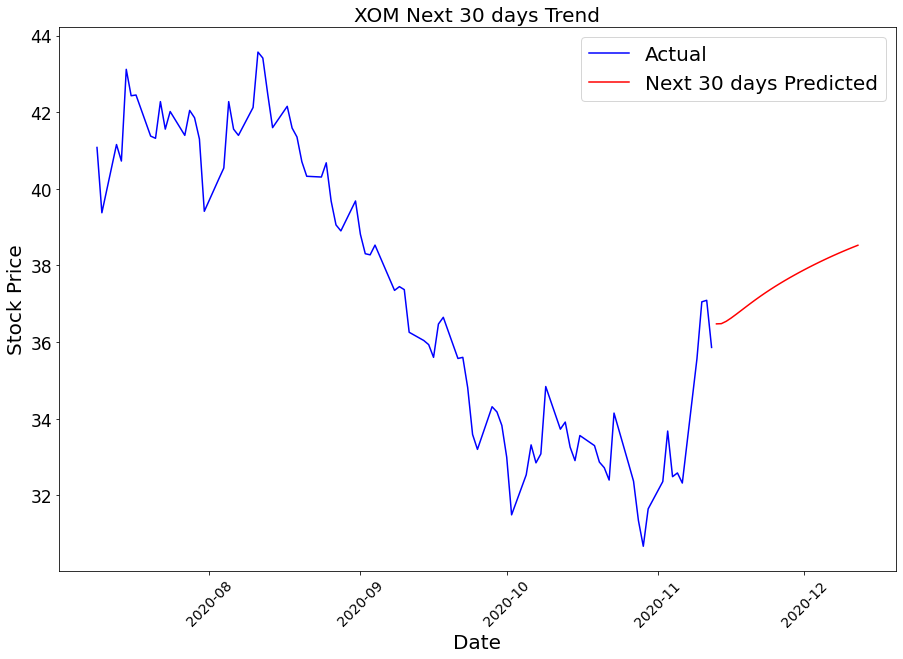

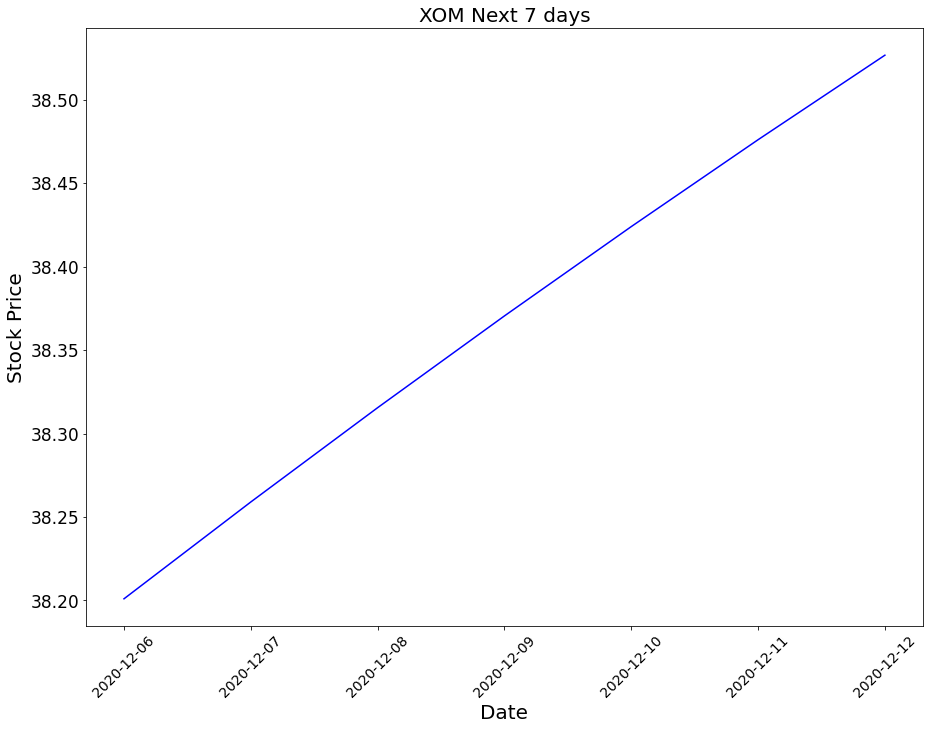

In [29]:
import csv
for S in Stocks:
    Pkl_Filename = "modeldata//"+S+".pkl"
    sc_file="modeldata//"+ S+"_sc.pkl"
    global sc
    with open(Pkl_Filename, 'rb') as file:  
        regressor = pickle.load(file)

    with open(sc_file, 'rb') as file:  
        sc = pickle.load(file)
        
    stk = yf.Ticker(S)
    df= stk.history(period="10y")
    df.iloc[:,0:5].to_csv(S+".csv")
    df = pd.read_csv(S+".csv",index_col="Date",parse_dates=True)
    df= df[-90:]
    df= df[['Open']]
# df=df[-60:]
    test_data= df
    x_input=test_data[-60:]
    x_input= sc.transform(x_input)
    temp_input=list(x_input)
    train_days= 60
    df= df[['Open']]

    lst_output=[]
    n_steps=60
    i=0;
    while(i<30):
        if(len(temp_input)>60):
            x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input=x_input.reshape((1,n_steps,1))
            yhat=regressor.predict(x_input,verbose=0)
#         print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input=x_input.reshape((1,n_steps,1))
            yhat=regressor.predict(x_input,verbose=0)
#         print(yhat[0])
            temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    lst_output=lst_output[0:30]
    predicted_stock_price = lst_output
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    predicted_stock_price=np.array(predicted_stock_price)
    df3=pd.DataFrame(predicted_stock_price)
    data=df[-1:]
    df2=pd.read_csv(S+".csv",parse_dates=True)
    s=df2.iloc[-1:,[0]]
    result=s.to_string(index=False)
    result=result[-10:]
    index_ = pd.date_range(result, periods = 31, freq ='D')
    index_= index_[-30:]
    index_
    df3.set_index(index_,inplace=True, drop = False)
    plt.figure(figsize=(15,10))
    plt.plot(df, color='blue')
    plt.plot(df3, color='red')
    plt.title(S+" Next 30 days Trend",fontsize=20)
    plt.xlabel('Date',fontsize=20)
    plt.ylabel('Stock Price',fontsize=20)
    plt.xticks(rotation=45)
    plt.legend(['Actual','Next 30 days Predicted'],fontsize=20)
    plt.savefig("modeldata//"+S+'predictedjoin.png')
    df4=df3[-7:]
    plt.figure(figsize=(15,11))
    plt.plot(df4, color='blue')
    plt.title(S+" Next 7 days",fontsize=20)
    plt.xlabel('Date',fontsize=20)
    plt.ylabel('Stock Price',fontsize=20)
    plt.xticks(rotation=45)
    plt.rc('ytick', labelsize=17)
    plt.rc('xtick', labelsize=14)
    plt.savefig("modeldata//"+S+'predicted.png')
    temp=df3[-8:-7]
    print(temp)
    temp.to_csv("modeldata//"+S+"_predicted.csv", mode='w', index=False)
    temp1=df3[-1:]
    print(temp1)
    temp1.to_csv("modeldata//"+S+"_predicteddays.csv", mode='w', index=False)
#     temp1=df3[-1:0]
#     temp1.to_csv("modeldata//"+S+"_predicted.csv", mode='a', index=False)
#     w="modeldata//"+S+"_predicted.csv"
#     w1 = csv.writer(open(w,'a'), dialect='excel')
#     temp1=df3[-1:0]
#     temp1=np.array(temp1)
#     w1.writerows(temp1)
#     df_write.to_csv("modeldata//"+S+"_predicted.csv", index=False)
#     import datetime
    
#     x=datetime.datetime.now() + datetime.timedelta(days=7)
#     today_date= x.strftime("%x")
    
# #     df_write= pd.read_csv("modeldata//"+S+"_predicted.csv")
# #     df_write.head()
    
#     temp = pd.DataFrame([[today_date, predicted_stock_price[0][0]]], columns=['Date', 'Predicted Price'])
#     if(len(df_write)==0 or df_write.iloc[-1,0]!=today_date):
#         df_write= df_write.append(temp, ignore_index= True);
        
#     df_write.to_csv("modeldata//"+S+"_predicted.csv", index=False)
    
#     print(S+" Done !!")
    
    


    
   